# Pymaceuticals Inc.
---

### Analysis

- While the effectiveness of Capomulin seems to be comparable to Ramicane, it is significantly more effective than Infubinol and Ceftamine (based on the box plots of the final tumor volumes)

- The heavier the mouse, the less effective the drug is (see scatter plot). This is a reliable conclusion because of the strong r-value correlation (0.95) resulting from the linear regression.

- The results of the study are very consistent, thus reliable, as there is only 1 outlier in the data set for the top drugs, and none for Capomulin

 After reviewing the results of merging the test data, cleaning it and Summary information, bar charts, pie charts, the box plots, the line graph, scatter plot, and the correlation/regression plots, the following trends could be seen. • Based upon the statistical summary information, Capomulin and Ramicane had the greatest impact on reducing tumor volume • The bar charts showed the greatest number of tests were also completed on Capomulin and Ramicane. • The pie charts showed the distribution of male to female was about even within 1% of 50/50. • The Quartiles, Outliers and Boxplots showed Capomulin and Ramicane had the greatest impact on reducing tumor volume. o Based upon the quartiles, it would appear Ramicane may have slightly better results because the upper quartile was slightly lower as well as the lower quartile. • The line plot for mouse l1509 using Capomulin treatment showed the tumor continued to grow until about day 20, then the tumor reduced in sized for the next 15 days, and then started to grow again. I would appear the observations were stopped after about 45 days. o Longer tests may need to be performed to see if the tumors continue to grow. • The scatter plot combined with Linear regression showed a positive correlation between mouse weight and average volume of Tumor. o It could be concluded that larger mice have larger tumors o Possibly there could be a correlation that fatter mice have larger tumors.

Three Conclusions:

Capomulin and Ramicane had the greatest impact on reducing tumor size.
a. It would appear that it takes about 20 days to take effect b. Possibly the drug effect starts to become non-effective after 35 days. 2. The weight of the mouse seemed to impact the volume of tumor. (larger mice have more tumor volume). 3. Ramicane might be slightly better than Capomulin based upon the box plot. 4. Who ever took the test, may have favored Capomulin and Ramicane because they performed about 20% more tests. a. Seems odd the best drugs had the most testing completed.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
count_mice = merged_df['Mouse ID'].nunique()
count_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_df.loc[merged_df['Mouse ID'] == "g989"]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#HELP!!

# clean_df = merged_df.loc[merged_df["Mouse ID"] =="g989",:]

cleaned_data = merged_df[~merged_df['Mouse ID'].isin(duplicate_mice)]
print("\nData cleaned. Duplicate mouse IDs removed.")
cleaned_data.head()


Data cleaned. Duplicate mouse IDs removed.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# Calculate mean of Tumor Volume for each regimen
tumor_mean = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()

# Calculate median of Tumor Volume for each regimen
tumor_median = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()

# Calculate variance of Tumor Volume for each regimen
tumor_variance = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()

# Calculate standard deviation of Tumor Volume for each regimen
tumor_std = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()

# Calculate standard of errors (SEM) of Tumor Volume for each regimen
tumor_sem = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({'Mean Tumor Volume' : tumor_mean,
                           'median' : tumor_median,
                           'variance': tumor_variance,
                           'standard deviation' : tumor_std,
                           'standard of errors' : tumor_sem})
tumor_summary

#FIX TITLES!

,Mean Tumor Volume,median,variance,standard deviation,standard of errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summary.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

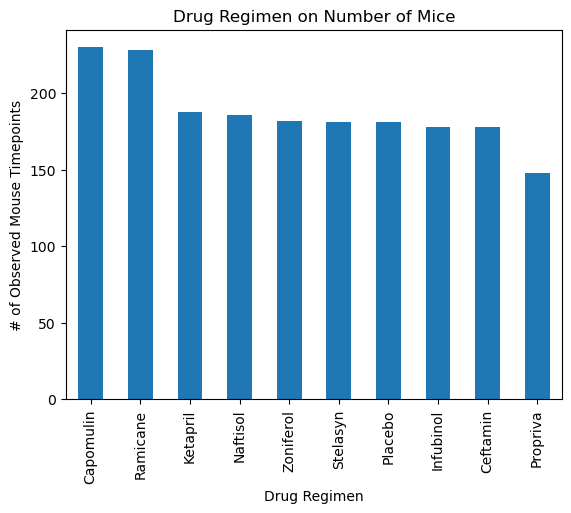

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_mice = cleaned_data['Drug Regimen'].value_counts()
bar_mice.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug Regimen on Number of Mice')
plt.show()


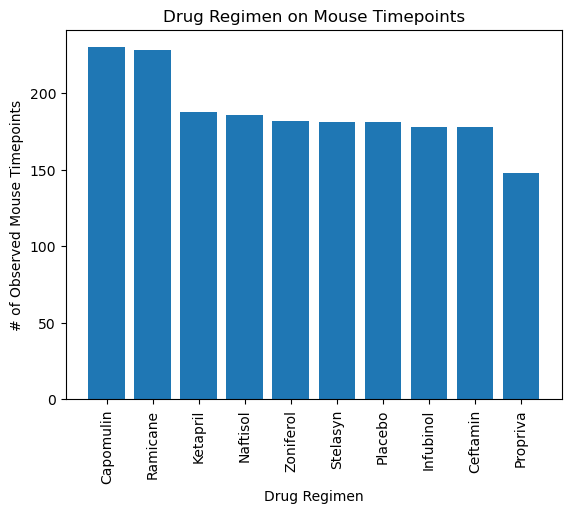

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
bar_mice = cleaned_data['Drug Regimen'].value_counts()

# Create a list indicating where to write labels and set figure size
plt.bar(bar_mice.index.values, bar_mice.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Drug Regimen on Mouse Timepoints')
# plt.figure(figsize=(10,5))


plt.xticks(rotation= 90)
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

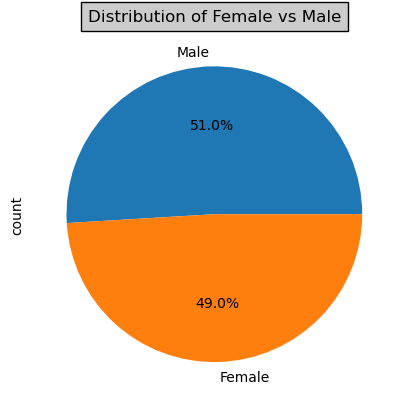

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = cleaned_data['Sex'].value_counts()
print(mice_sex)

mice_sex.plot(kind='pie', autopct='%1.1f%%')
# extra - give title
plt.title('Distribution of Female vs Male', bbox={'facecolor':'0.8', 'pad':5})
plt.show


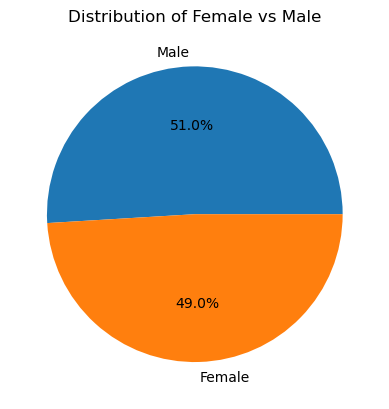

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = cleaned_data['Sex'].value_counts()

plt.pie(mice_sex.values, labels=mice_sex.index.values, autopct='%1.1f%%', startangle=360)
#extra - add title
plt.title('Distribution of Female vs Male')
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = (cleaned_data.groupby('Mouse ID')['Timepoint'].max()).reset_index()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df = max_timepoint.merge(cleaned_data, on=['Mouse ID','Timepoint'], how = 'left')
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [42]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# loop through all treatements
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = combined_df.loc[combined_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    drug_values.append(final_tumor)

    # calculate quartiles, IQR and find outliers
    quartiles = final_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor.loc [(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print (f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


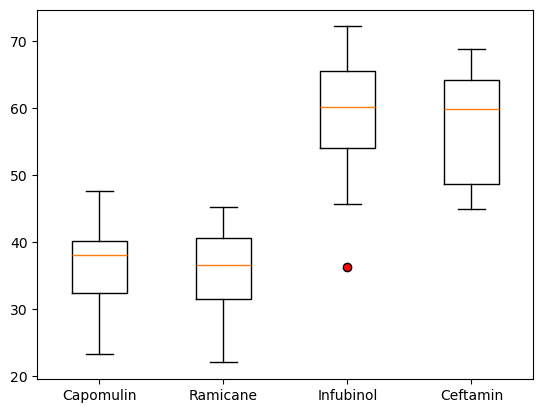

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# fig1, ax1 = plt.subplots()
# ax1.set_title('Tumor Volume by Treatment Drug')
# ax1.set_ylabel('Final Tumor Volume (mm3)')
# ax1.set_xlabel('Drug Regimen')
plt.boxplot(drug_values, labels=drugs, flierprops=dict(markerfacecolor='r', marker='o'))

# Display the box plot
plt.show()

## Line and Scatter Plots

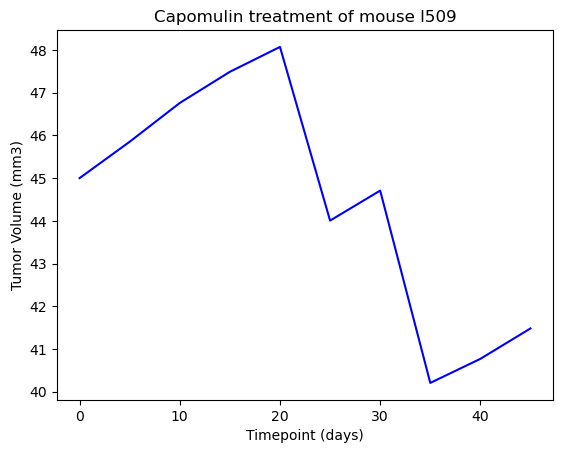

In [44]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Importing Matplotlib for plotting
import matplotlib.pyplot as plt

# Step 1: Filter data for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Selecting a specific mouse.
mouse_id = 'l509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Step 2: Generate a line plot of tumor volume vs. time point for the selected mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='b')
plt.xlabel('Timepoint (days)')  # X-axis label
plt.ylabel('Tumor Volume (mm3)')  # Y-axis label
#add title
plt.title(f"Capomulin treatment of mouse {mouse_id}")
# display plot
plt.show()

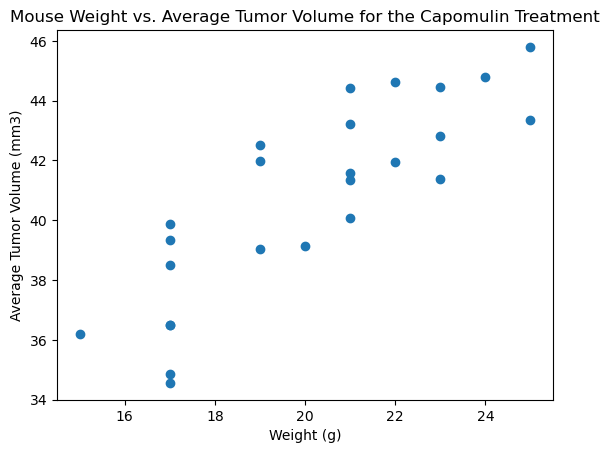

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# make scatter plot with data
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Treatment')

# Display the scatter plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


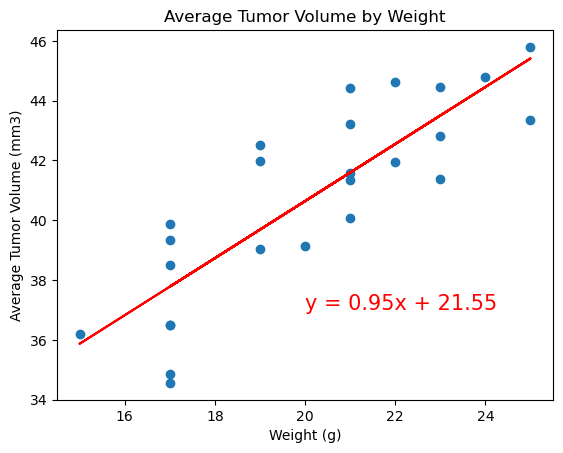

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st
from scipy.stats import linregress


capomulin_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
avg_vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()
avg_vol = pd.merge(capomulin_df, avg_vol, on='Mouse ID')
final_avg = avg_vol[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg
x = final_avg['Weight (g)']
y = final_avg['avg_tumor_vol']

# correlation coeffiecient calculation
correlation = st.pearsonr(x, y)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# linear regression calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regression,"r-")

# Annotate linear regression
plt.annotate(line_equation,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display the combined scatter plot and linear regression model
plt.show()